In [22]:
!mkdir -p vncorenlp/models/wordsegmenter
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar vncorenlp/ 
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/
!pip3 install vncorenlp

--2022-10-11 09:51:02--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27412575 (26M) [application/octet-stream]
Saving to: ‘VnCoreNLP-1.1.1.jar’

VnCoreNLP-1.1.1.jar 100%[===================>]  26.14M   163MB/s    in 0.2s    

2022-10-11 09:51:02 (163 MB/s) - ‘VnCoreNLP-1.1.1.jar’ saved [27412575/27412575]

--2022-10-11 09:51:02--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respon

In [2]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

fatal: destination path 'models' already exists and is not an empty directory.


In [3]:
!pip install -Uqr models/official/requirements.txt

In [4]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')

In [5]:
!git clone https://github.com/tensorflow/models.git

import os
os.environ['PYTHONPATH'] += ":/content/models"

import sys
sys.path.append("/content/models")

fatal: destination path 'models' already exists and is not an empty directory.


In [6]:
pip install -q -U "tensorflow-text==2.9.*"

In [9]:
pip install -q tf-models-official==2.4.0

In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
#import tensorflow_models as tfm
import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [3]:
import os

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from official.modeling import tf_utils
from official import nlp
from official.nlp import bert

# Load the required submodules
import official.nlp.optimization
import official.nlp.bert.bert_models
import official.nlp.bert.configs
import official.nlp.bert.run_classifier
import official.nlp.bert.tokenization
import official.nlp.data.classifier_data_lib
import official.nlp.modeling.losses
import official.nlp.modeling.models
import official.nlp.modeling.networks

In [4]:
from official.nlp.data import classifier_data_lib

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip', compression='zip', low_memory=False)
df.shape

(1306122, 3)

In [6]:
df.tail(20)

,qid,question_text,target
1306102,ffff3778790af9baae76,What steps can I take to live a normal life if...,0
1306103,ffff3f0a2449ffe4b9ff,Isn't Trump right after all? Why should the US...,1
1306104,ffff41393389d4206066,Is 33 too late for a career in creative advert...,0
1306105,ffff42493fc203cd9532,What is difference between the filteration wor...,0
1306106,ffff48dd47bee89fff79,"If the universe ""popped"" into existence from n...",0
1306107,ffff5fd051a032f32a39,How does a shared service technology team meas...,0
1306108,ffff6d528040d3888b93,How is DSATM civil engineering?,0
1306109,ffff8776cd30cdc8d7f8,Do you know any problem that depends solely on...,0
1306110,ffff94d427ade3716cd1,What are some comic ideas for you Tube videos ...,0
1306111,ffffa382c58368071dc9,"If you had $10 million of Bitcoin, could you s...",0


<AxesSubplot:title={'center':'Target distribution'}, ylabel='Frequency'>

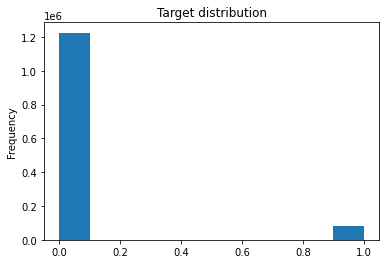

In [7]:
df.target.plot(kind='hist', title = 'Target distribution')

In [8]:
train_df, remaining = train_test_split(df, random_state = 42, train_size=0.0075, stratify=df.target.values)
valid_df, _ = train_test_split(remaining, random_state = 42, train_size=0.00075, stratify=remaining.target.values)
train_df.shape, valid_df.shape

((9795, 3), (972, 3))

In [9]:
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_df['question_text'].values, train_df['target'].values))
  valid_data = tf.data.Dataset.from_tensor_slices((valid_df['question_text'].values, valid_df['target'].values))

  for text, label in train_data.take(1):
    print(text)
    print(label)


tf.Tensor(b'Why are unhealthy relationships so desirable?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


In [10]:
label_list = [0, 1]
max_seq_length = 125
train_batch_size = 32

bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2", trainable=True)

vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = bert.tokenization.FullTokenizer(vocab_file, do_lower_case)


In [15]:
from vncorenlp import VnCoreNLP
rdrsegmenter = VnCoreNLP("vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') 



In [31]:
text = "Đường Tăng đi tại Tây Trúc"

# Tokenize câu gốc và thay từ phò bằng <mask>
words = rdrsegmenter.tokenize(text)[0]
words

['Đường', 'Tăng', 'đi', 'tại', 'Tây_Trúc']

In [35]:
from keras.preprocessing.text import Tokenizer
tok = Tokenizer()
tok.fit_on_texts(words)
words = tok.texts_to_sequences(words)

In [36]:
words

[[1], [2], [3], [4], [5, 6]]

In [34]:
from keras_preprocessing.sequence import pad_sequences

pad_rev= pad_sequences(words, maxlen=125, padding='post')
pad_rev

ValueError: ignored

In [13]:
tokenizer.wordpiece_tokenizer.tokenize('hi how are you')

['hi', 'how', 'are', 'you']

In [18]:
tokenizer.convert_tokens_to_ids(rdrsegmenter.tokenize('xin chào xin chào tôi tên là')[0])

KeyError: ignored